In [1]:
import pandas as pd
import model
import argparse
from tensorflow.keras.callbacks import History, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from sklearn import preprocessing
from matplotlib import pyplot as plt
import os
import numpy as np

In [2]:
file_path = "training_set.csv"
df = pd.read_csv(file_path)
data = df.values


In [3]:
df.head()

,day,order_in_month,month,hour,minute,load
0,0,2.0,0,0.0,0.0,81.24
1,0,3.0,0,0.0,0.0,81.24
2,0,0.0,0,0.0,0.0,66.32
3,0,0.0,0,0.0,0.0,88.86
4,0,3.0,0,0.0,15.0,80.99


In [5]:
Y = df["load"].values.reshape(-1,1) # training label
X = df[df.columns[:-1]].values.reshape(-1,5)  # training data

In [6]:
Y

array([[81.24],
       [81.24],
       [66.32],
       ...,
       [80.32],
       [92.37],
       [80.99]])

In [7]:
X

array([[ 0.,  2.,  0.,  0.,  0.],
       [ 0.,  3.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       ...,
       [ 6.,  3., 11., 23., 45.],
       [ 6.,  0., 11., 23., 45.],
       [ 6.,  2., 11., 23., 45.]])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.15, shuffle=True)

In [82]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD,Adam

In [83]:
model = Sequential()

model.add(Dense(300,
                activation='relu',
                input_shape = X_train.shape[1:]))

model.add(Dense(90,
                activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(30,
                activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,
                activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,
                activation='linear'))



In [165]:
epochs = 20000
checkpoint_file = "checkpoint/c.hdf5"
model_file = "model/m.h5"

In [166]:
optimizer = Adam(0.0005)
model.compile(optimizer=optimizer,
              loss='mse')

In [167]:
model_checkpoint = ModelCheckpoint(filepath=checkpoint_file,save_best_only=True)

In [168]:
hist = model.fit(X_train, y_train,validation_split=0.15,
            callbacks=[model_checkpoint],
          batch_size=64, epochs=epochs,shuffle=True)
model.save(model_file)

Train on 17948 samples, validate on 3168 samples
Epoch 1/20000
17948/17948 [==============================] - 1s 52us/sample - loss: 70.9816 - val_loss: 193.5632
Epoch 2/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.6388 - val_loss: 195.9686
Epoch 3/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8809 - val_loss: 197.7541
Epoch 4/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.9303 - val_loss: 195.2887
Epoch 5/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.8194 - val_loss: 192.1593
Epoch 6/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5161 - val_loss: 193.5973
Epoch 7/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 71.0686 - val_loss: 196.3753
Epoch 8/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6575 - val_loss: 193.2541
Epoch 9/20000
17948/17948 [====================

17948/17948 [==============================] - 1s 34us/sample - loss: 70.5604 - val_loss: 193.4928
Epoch 73/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.9025 - val_loss: 194.7968
Epoch 74/20000
17948/17948 [==============================] - 1s 37us/sample - loss: 70.7829 - val_loss: 192.8304
Epoch 75/20000
17948/17948 [==============================] - 1s 36us/sample - loss: 70.7444 - val_loss: 195.0961
Epoch 76/20000
17948/17948 [==============================] - 1s 34us/sample - loss: 70.7920 - val_loss: 195.5371
Epoch 77/20000
17948/17948 [==============================] - 1s 41us/sample - loss: 70.6793 - val_loss: 194.5251
Epoch 78/20000
17948/17948 [==============================] - 1s 37us/sample - loss: 70.5750 - val_loss: 192.2009
Epoch 79/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7886 - val_loss: 192.2593
Epoch 80/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.9765 - val_loss

17948/17948 [==============================] - 1s 30us/sample - loss: 70.6065 - val_loss: 192.7013
Epoch 144/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.8582 - val_loss: 192.4429
Epoch 145/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6868 - val_loss: 192.8547
Epoch 146/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.7442 - val_loss: 194.7325
Epoch 147/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8113 - val_loss: 196.1157
Epoch 148/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.8652 - val_loss: 191.3981
Epoch 149/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.4438 - val_loss: 195.7989
Epoch 150/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.8382 - val_loss: 191.2115
Epoch 151/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7695 - 

17948/17948 [==============================] - 1s 33us/sample - loss: 70.8575 - val_loss: 189.3941
Epoch 215/20000
17948/17948 [==============================] - 1s 34us/sample - loss: 70.9391 - val_loss: 193.3032
Epoch 216/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.8042 - val_loss: 194.8962
Epoch 217/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7403 - val_loss: 192.3482
Epoch 218/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7424 - val_loss: 193.1749
Epoch 219/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8730 - val_loss: 194.0129
Epoch 220/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6938 - val_loss: 193.6704
Epoch 221/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6322 - val_loss: 191.5535
Epoch 222/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8827 - 

17948/17948 [==============================] - 1s 31us/sample - loss: 70.5369 - val_loss: 192.8535
Epoch 286/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.3255 - val_loss: 191.8464
Epoch 287/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.5997 - val_loss: 191.5772
Epoch 288/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.6054 - val_loss: 191.9472
Epoch 289/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8533 - val_loss: 195.7940
Epoch 290/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6424 - val_loss: 191.9309
Epoch 291/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.5614 - val_loss: 193.7675
Epoch 292/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.9652 - val_loss: 193.8250
Epoch 293/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 71.1163 - 

17948/17948 [==============================] - 1s 30us/sample - loss: 70.7519 - val_loss: 191.9066
Epoch 357/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5551 - val_loss: 194.1076
Epoch 358/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7750 - val_loss: 192.8965
Epoch 359/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6519 - val_loss: 194.2215
Epoch 360/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.4902 - val_loss: 193.8699
Epoch 361/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.3890 - val_loss: 196.2196
Epoch 362/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8392 - val_loss: 193.8844
Epoch 363/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8656 - val_loss: 193.8943
Epoch 364/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.7838 - 

17948/17948 [==============================] - 1s 30us/sample - loss: 70.9702 - val_loss: 192.8670
Epoch 428/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.5917 - val_loss: 194.7769
Epoch 429/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8003 - val_loss: 195.0208
Epoch 430/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 71.2444 - val_loss: 194.2019
Epoch 431/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7258 - val_loss: 193.4014
Epoch 432/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5412 - val_loss: 192.9067
Epoch 433/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.6732 - val_loss: 192.9070
Epoch 434/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.7377 - val_loss: 195.6203
Epoch 435/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.6765 - 

17948/17948 [==============================] - 1s 30us/sample - loss: 70.7266 - val_loss: 192.5643
Epoch 499/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 71.4339 - val_loss: 193.4298
Epoch 500/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5445 - val_loss: 192.8347
Epoch 501/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.3295 - val_loss: 195.4415
Epoch 502/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6771 - val_loss: 192.8872
Epoch 503/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6111 - val_loss: 195.7760
Epoch 504/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6395 - val_loss: 194.2768
Epoch 505/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.6691 - val_loss: 193.0701
Epoch 506/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8083 - 

17948/17948 [==============================] - 1s 30us/sample - loss: 70.7673 - val_loss: 191.5651
Epoch 570/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8200 - val_loss: 192.0539
Epoch 571/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6332 - val_loss: 195.4297
Epoch 572/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7230 - val_loss: 191.5720
Epoch 573/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7902 - val_loss: 193.0394
Epoch 574/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7764 - val_loss: 192.9927
Epoch 575/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7055 - val_loss: 191.6779
Epoch 576/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7574 - val_loss: 197.2067
Epoch 577/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.6916 - 

17948/17948 [==============================] - 1s 30us/sample - loss: 70.7186 - val_loss: 195.1462
Epoch 641/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 71.0712 - val_loss: 190.5150
Epoch 642/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8637 - val_loss: 194.3057
Epoch 643/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8012 - val_loss: 194.4809
Epoch 644/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6509 - val_loss: 193.2937
Epoch 645/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7197 - val_loss: 192.9583
Epoch 646/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.7157 - val_loss: 193.2216
Epoch 647/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.5944 - val_loss: 192.1119
Epoch 648/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8941 - 

17948/17948 [==============================] - 1s 33us/sample - loss: 70.5753 - val_loss: 197.9358
Epoch 712/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6566 - val_loss: 193.0944
Epoch 713/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.6479 - val_loss: 192.4641
Epoch 714/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.8113 - val_loss: 191.4754
Epoch 715/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.3255 - val_loss: 193.5560
Epoch 716/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.5814 - val_loss: 191.1053
Epoch 717/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.5885 - val_loss: 194.5257
Epoch 718/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.7595 - val_loss: 193.5235
Epoch 719/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7807 - 

17948/17948 [==============================] - 1s 30us/sample - loss: 70.9956 - val_loss: 191.4483
Epoch 783/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.8516 - val_loss: 194.4188
Epoch 784/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7626 - val_loss: 195.0415
Epoch 785/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7301 - val_loss: 193.7920
Epoch 786/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.7045 - val_loss: 195.7854
Epoch 787/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7065 - val_loss: 194.1862
Epoch 788/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5012 - val_loss: 192.1294
Epoch 789/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.6027 - val_loss: 189.4887
Epoch 790/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7903 - 

17948/17948 [==============================] - 1s 31us/sample - loss: 70.6788 - val_loss: 196.0365
Epoch 854/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.7457 - val_loss: 190.8063
Epoch 855/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.6031 - val_loss: 195.0950
Epoch 856/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 71.2153 - val_loss: 194.0059
Epoch 857/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.9813 - val_loss: 195.6665
Epoch 858/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7082 - val_loss: 194.0746
Epoch 859/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6361 - val_loss: 193.3412
Epoch 860/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.6644 - val_loss: 193.3500
Epoch 861/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5777 - 

17948/17948 [==============================] - 1s 30us/sample - loss: 70.7038 - val_loss: 193.5404
Epoch 925/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.3467 - val_loss: 191.0842
Epoch 926/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5257 - val_loss: 193.9857
Epoch 927/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8961 - val_loss: 194.3645
Epoch 928/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8393 - val_loss: 193.6467
Epoch 929/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7467 - val_loss: 194.4766
Epoch 930/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8670 - val_loss: 195.0015
Epoch 931/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.4790 - val_loss: 196.1467
Epoch 932/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.8345 - 

17948/17948 [==============================] - 1s 30us/sample - loss: 70.8681 - val_loss: 194.8227
Epoch 996/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6535 - val_loss: 192.5232
Epoch 997/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.9486 - val_loss: 192.1715
Epoch 998/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.4483 - val_loss: 190.6141
Epoch 999/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.6163 - val_loss: 191.0412
Epoch 1000/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.8393 - val_loss: 195.7254
Epoch 1001/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5262 - val_loss: 192.6657
Epoch 1002/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8320 - val_loss: 191.8371
Epoch 1003/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.539

Epoch 1066/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7689 - val_loss: 193.8198
Epoch 1067/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5297 - val_loss: 191.0050
Epoch 1068/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.3932 - val_loss: 193.7496
Epoch 1069/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.9843 - val_loss: 189.6025
Epoch 1070/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.7063 - val_loss: 192.7469
Epoch 1071/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.9360 - val_loss: 191.2524
Epoch 1072/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5710 - val_loss: 193.7400
Epoch 1073/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.6417 - val_loss: 193.9848
Epoch 1074/20000
17948/17948 [==============================] - 1s 30us/

17948/17948 [==============================] - 1s 31us/sample - loss: 70.6210 - val_loss: 193.2833
Epoch 1137/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70.8159 - val_loss: 193.1870
Epoch 1138/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7613 - val_loss: 194.4795
Epoch 1139/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6775 - val_loss: 193.6404
Epoch 1140/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5611 - val_loss: 193.5747
Epoch 1141/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8049 - val_loss: 196.3776
Epoch 1142/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7808 - val_loss: 195.6856
Epoch 1143/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 71.0507 - val_loss: 193.4536
Epoch 1144/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70

17948/17948 [==============================] - 1s 31us/sample - loss: 70.6981 - val_loss: 190.6387
Epoch 1207/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8739 - val_loss: 193.4752
Epoch 1208/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.4457 - val_loss: 193.2967
Epoch 1209/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8799 - val_loss: 192.4367
Epoch 1210/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6385 - val_loss: 192.4431
Epoch 1211/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6200 - val_loss: 194.1640
Epoch 1212/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.8169 - val_loss: 191.0353
Epoch 1213/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7653 - val_loss: 194.5650
Epoch 1214/20000
17948/17948 [==============================] - 1s 30us/sample - loss: 70

17948/17948 [==============================] - 1s 30us/sample - loss: 70.4065 - val_loss: 192.3966
Epoch 1277/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5625 - val_loss: 195.8288
Epoch 1278/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5665 - val_loss: 193.2490
Epoch 1279/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 71.1894 - val_loss: 194.6630
Epoch 1280/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.7787 - val_loss: 192.0398
Epoch 1281/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6377 - val_loss: 194.6176
Epoch 1282/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5440 - val_loss: 190.6026
Epoch 1283/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5025 - val_loss: 194.2670
Epoch 1284/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70

Epoch 1347/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7928 - val_loss: 194.1118
Epoch 1348/20000
17948/17948 [==============================] - 1s 35us/sample - loss: 70.7897 - val_loss: 193.0552
Epoch 1349/20000
17948/17948 [==============================] - 1s 35us/sample - loss: 70.8646 - val_loss: 196.1389
Epoch 1350/20000
17948/17948 [==============================] - 1s 35us/sample - loss: 70.6958 - val_loss: 195.9080
Epoch 1351/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.4759 - val_loss: 194.4433
Epoch 1352/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6054 - val_loss: 194.5693
Epoch 1353/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6748 - val_loss: 191.1855
Epoch 1354/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4960 - val_loss: 193.0739
Epoch 1355/20000
17948/17948 [==============================] - 1s 34us/

17948/17948 [==============================] - 1s 37us/sample - loss: 70.8300 - val_loss: 193.5907
Epoch 1418/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8205 - val_loss: 192.8617
Epoch 1419/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6523 - val_loss: 194.5278
Epoch 1420/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6723 - val_loss: 194.0913
Epoch 1421/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6830 - val_loss: 192.9004
Epoch 1422/20000
17948/17948 [==============================] - 1s 34us/sample - loss: 70.4722 - val_loss: 192.4043
Epoch 1423/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6222 - val_loss: 195.3292
Epoch 1424/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5213 - val_loss: 194.9187
Epoch 1425/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

17948/17948 [==============================] - 1s 37us/sample - loss: 70.7236 - val_loss: 195.8020
Epoch 1488/20000
17948/17948 [==============================] - 1s 36us/sample - loss: 70.5427 - val_loss: 193.6703
Epoch 1489/20000
17948/17948 [==============================] - 1s 34us/sample - loss: 70.6618 - val_loss: 193.1747
Epoch 1490/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.6356 - val_loss: 193.0886
Epoch 1491/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.6967 - val_loss: 193.0998
Epoch 1492/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.3593 - val_loss: 192.7737
Epoch 1493/20000
17948/17948 [==============================] - 1s 34us/sample - loss: 70.6865 - val_loss: 193.1813
Epoch 1494/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.4992 - val_loss: 193.7943
Epoch 1495/20000
17948/17948 [==============================] - 1s 36us/sample - loss: 70

Epoch 1558/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7678 - val_loss: 192.4841
Epoch 1559/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7532 - val_loss: 193.5554
Epoch 1560/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.4280 - val_loss: 195.1754
Epoch 1561/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 71.1050 - val_loss: 189.8748
Epoch 1562/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7429 - val_loss: 193.4034
Epoch 1563/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2584 - val_loss: 191.9821
Epoch 1564/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6120 - val_loss: 194.3234
Epoch 1565/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7241 - val_loss: 193.9367
Epoch 1566/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 33us/sample - loss: 70.7669 - val_loss: 193.0737
Epoch 1629/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6722 - val_loss: 191.6510
Epoch 1630/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.5602 - val_loss: 193.0994
Epoch 1631/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.7362 - val_loss: 192.7456
Epoch 1632/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5908 - val_loss: 192.9344
Epoch 1633/20000
17948/17948 [==============================] - 1s 43us/sample - loss: 70.5548 - val_loss: 193.5600
Epoch 1634/20000
17948/17948 [==============================] - 1s 38us/sample - loss: 70.6206 - val_loss: 193.5126
Epoch 1635/20000
17948/17948 [==============================] - 1s 39us/sample - loss: 70.5553 - val_loss: 193.9406
Epoch 1636/20000
17948/17948 [==============================] - 1s 35us/sample - loss: 70

Epoch 1699/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.9458 - val_loss: 189.4463
Epoch 1700/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 71.1026 - val_loss: 192.7211
Epoch 1701/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7422 - val_loss: 192.0751
Epoch 1702/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6030 - val_loss: 193.7693
Epoch 1703/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6603 - val_loss: 193.4278
Epoch 1704/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6547 - val_loss: 194.6341
Epoch 1705/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4959 - val_loss: 193.5730
Epoch 1706/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4733 - val_loss: 193.8229
Epoch 1707/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.7037 - val_loss: 194.2204
Epoch 1770/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6670 - val_loss: 197.3254
Epoch 1771/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.5970 - val_loss: 193.7789
Epoch 1772/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5841 - val_loss: 193.3312
Epoch 1773/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5382 - val_loss: 192.3424
Epoch 1774/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4046 - val_loss: 194.7358
Epoch 1775/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4381 - val_loss: 193.7054
Epoch 1776/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8321 - val_loss: 193.9440
Epoch 1777/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 1840/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.9118 - val_loss: 193.7373
Epoch 1841/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4535 - val_loss: 196.6645
Epoch 1842/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6758 - val_loss: 197.7762
Epoch 1843/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6890 - val_loss: 194.5838
Epoch 1844/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7734 - val_loss: 196.2597
Epoch 1845/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6959 - val_loss: 193.1060
Epoch 1846/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7984 - val_loss: 191.9762
Epoch 1847/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 71.0419 - val_loss: 192.9665
Epoch 1848/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.7755 - val_loss: 195.4220
Epoch 1911/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6527 - val_loss: 193.4768
Epoch 1912/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6120 - val_loss: 193.9067
Epoch 1913/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4917 - val_loss: 197.2084
Epoch 1914/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6316 - val_loss: 196.5000
Epoch 1915/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7141 - val_loss: 193.8116
Epoch 1916/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6405 - val_loss: 195.4550
Epoch 1917/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6946 - val_loss: 194.6431
Epoch 1918/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 1981/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.9098 - val_loss: 191.2683
Epoch 1982/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8149 - val_loss: 193.8114
Epoch 1983/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4393 - val_loss: 191.8671
Epoch 1984/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6528 - val_loss: 195.0711
Epoch 1985/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.1558 - val_loss: 194.1568
Epoch 1986/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8456 - val_loss: 193.7499
Epoch 1987/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6643 - val_loss: 195.9786
Epoch 1988/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7781 - val_loss: 193.5765
Epoch 1989/20000
17948/17948 [==============================] - 1s 31us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.7487 - val_loss: 194.3525
Epoch 2052/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7639 - val_loss: 193.2437
Epoch 2053/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5191 - val_loss: 193.5498
Epoch 2054/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6846 - val_loss: 194.5018
Epoch 2055/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3965 - val_loss: 191.9507
Epoch 2056/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7054 - val_loss: 192.5286
Epoch 2057/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6249 - val_loss: 195.9267
Epoch 2058/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5212 - val_loss: 192.1074
Epoch 2059/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 2122/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5961 - val_loss: 192.3595
Epoch 2123/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4464 - val_loss: 194.8013
Epoch 2124/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.9103 - val_loss: 194.8117
Epoch 2125/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5780 - val_loss: 195.6164
Epoch 2126/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8328 - val_loss: 193.0145
Epoch 2127/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7709 - val_loss: 193.9405
Epoch 2128/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4157 - val_loss: 195.8418
Epoch 2129/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.6006 - val_loss: 195.3118
Epoch 2130/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.7239 - val_loss: 193.9914
Epoch 2193/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6594 - val_loss: 191.4566
Epoch 2194/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5570 - val_loss: 192.2788
Epoch 2195/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7489 - val_loss: 192.3154
Epoch 2196/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.6261 - val_loss: 194.7203
Epoch 2197/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7128 - val_loss: 195.6546
Epoch 2198/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7148 - val_loss: 193.3747
Epoch 2199/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6662 - val_loss: 195.7825
Epoch 2200/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 2263/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5924 - val_loss: 193.5889
Epoch 2264/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4553 - val_loss: 195.7013
Epoch 2265/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2962 - val_loss: 193.8256
Epoch 2266/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5866 - val_loss: 192.1268
Epoch 2267/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5508 - val_loss: 191.9520
Epoch 2268/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8186 - val_loss: 194.6817
Epoch 2269/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.5496 - val_loss: 197.3036
Epoch 2270/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6014 - val_loss: 193.5907
Epoch 2271/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.6400 - val_loss: 191.3780
Epoch 2334/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7249 - val_loss: 194.8487
Epoch 2335/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5360 - val_loss: 193.9413
Epoch 2336/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4412 - val_loss: 190.1763
Epoch 2337/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8332 - val_loss: 194.2327
Epoch 2338/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6706 - val_loss: 197.5952
Epoch 2339/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6083 - val_loss: 193.1567
Epoch 2340/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4774 - val_loss: 195.3767
Epoch 2341/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 2404/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6506 - val_loss: 194.1052
Epoch 2405/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8215 - val_loss: 194.0116
Epoch 2406/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4910 - val_loss: 194.3722
Epoch 2407/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5747 - val_loss: 199.8552
Epoch 2408/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5335 - val_loss: 193.2487
Epoch 2409/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4886 - val_loss: 194.6056
Epoch 2410/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5137 - val_loss: 192.7734
Epoch 2411/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5615 - val_loss: 191.5304
Epoch 2412/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.4111 - val_loss: 192.9729
Epoch 2475/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.5603 - val_loss: 192.2408
Epoch 2476/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6238 - val_loss: 193.6450
Epoch 2477/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5565 - val_loss: 192.9840
Epoch 2478/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7810 - val_loss: 195.5503
Epoch 2479/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2434 - val_loss: 197.1053
Epoch 2480/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8941 - val_loss: 193.6806
Epoch 2481/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.9083 - val_loss: 192.1636
Epoch 2482/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70

Epoch 2545/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4230 - val_loss: 195.7458
Epoch 2546/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.9891 - val_loss: 195.5020
Epoch 2547/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5016 - val_loss: 194.2510
Epoch 2548/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7374 - val_loss: 194.2043
Epoch 2549/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6503 - val_loss: 194.2247
Epoch 2550/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6154 - val_loss: 194.7279
Epoch 2551/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4792 - val_loss: 189.4514
Epoch 2552/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7546 - val_loss: 193.6738
Epoch 2553/20000
17948/17948 [==============================] - 1s 33us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.4721 - val_loss: 193.4648
Epoch 2616/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5174 - val_loss: 195.5436
Epoch 2617/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.9600 - val_loss: 195.1799
Epoch 2618/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7810 - val_loss: 191.0052
Epoch 2619/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8505 - val_loss: 194.3484
Epoch 2620/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6038 - val_loss: 196.8979
Epoch 2621/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6333 - val_loss: 191.6912
Epoch 2622/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4877 - val_loss: 192.6230
Epoch 2623/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 2686/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6460 - val_loss: 194.3884
Epoch 2687/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8766 - val_loss: 194.5243
Epoch 2688/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7660 - val_loss: 194.9972
Epoch 2689/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3551 - val_loss: 194.3245
Epoch 2690/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4912 - val_loss: 194.8061
Epoch 2691/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7056 - val_loss: 194.0514
Epoch 2692/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.4786 - val_loss: 192.5706
Epoch 2693/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4604 - val_loss: 193.5471
Epoch 2694/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.7408 - val_loss: 193.4495
Epoch 2757/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.5949 - val_loss: 191.1647
Epoch 2758/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4458 - val_loss: 193.0864
Epoch 2759/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3540 - val_loss: 192.7347
Epoch 2760/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3639 - val_loss: 194.1879
Epoch 2761/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4837 - val_loss: 190.9234
Epoch 2762/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5376 - val_loss: 197.6907
Epoch 2763/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5633 - val_loss: 192.9163
Epoch 2764/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 2827/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5613 - val_loss: 194.3142
Epoch 2828/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6255 - val_loss: 192.5814
Epoch 2829/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7083 - val_loss: 191.9696
Epoch 2830/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.4914 - val_loss: 194.6467
Epoch 2831/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6220 - val_loss: 195.7670
Epoch 2832/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6164 - val_loss: 191.9945
Epoch 2833/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7488 - val_loss: 193.7881
Epoch 2834/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6748 - val_loss: 193.7909
Epoch 2835/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.6363 - val_loss: 193.9650
Epoch 2898/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 71.0160 - val_loss: 191.3975
Epoch 2899/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7480 - val_loss: 194.0211
Epoch 2900/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7950 - val_loss: 194.1564
Epoch 2901/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6058 - val_loss: 192.9743
Epoch 2902/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4734 - val_loss: 191.2627
Epoch 2903/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6405 - val_loss: 193.4188
Epoch 2904/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6032 - val_loss: 193.7384
Epoch 2905/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 2968/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.9088 - val_loss: 193.8368
Epoch 2969/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8367 - val_loss: 193.1374
Epoch 2970/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.3765 - val_loss: 193.4980
Epoch 2971/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4640 - val_loss: 195.2481
Epoch 2972/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8818 - val_loss: 189.4404
Epoch 2973/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 71.1808 - val_loss: 193.1498
Epoch 2974/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2383 - val_loss: 194.8987
Epoch 2975/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4253 - val_loss: 196.3114
Epoch 2976/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.7884 - val_loss: 195.8108
Epoch 3039/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5162 - val_loss: 194.1814
Epoch 3040/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7608 - val_loss: 194.8481
Epoch 3041/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3726 - val_loss: 194.3654
Epoch 3042/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6727 - val_loss: 192.9548
Epoch 3043/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6701 - val_loss: 194.4064
Epoch 3044/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5510 - val_loss: 193.5056
Epoch 3045/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6013 - val_loss: 195.3029
Epoch 3046/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 3109/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8398 - val_loss: 190.6378
Epoch 3110/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5819 - val_loss: 194.4052
Epoch 3111/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7094 - val_loss: 190.0471
Epoch 3112/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4883 - val_loss: 194.7854
Epoch 3113/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8503 - val_loss: 194.9008
Epoch 3114/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3823 - val_loss: 195.2965
Epoch 3115/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6543 - val_loss: 196.8367
Epoch 3116/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2447 - val_loss: 197.4762
Epoch 3117/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.7618 - val_loss: 196.7746
Epoch 3180/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5963 - val_loss: 195.9860
Epoch 3181/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7001 - val_loss: 194.1300
Epoch 3182/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2732 - val_loss: 194.2228
Epoch 3183/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5030 - val_loss: 193.5360
Epoch 3184/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6401 - val_loss: 192.2159
Epoch 3185/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6619 - val_loss: 195.6803
Epoch 3186/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.6754 - val_loss: 195.2256
Epoch 3187/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 3250/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5171 - val_loss: 193.7322
Epoch 3251/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4948 - val_loss: 196.5891
Epoch 3252/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4597 - val_loss: 194.8155
Epoch 3253/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5081 - val_loss: 193.9091
Epoch 3254/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4455 - val_loss: 196.8665
Epoch 3255/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7674 - val_loss: 195.3939
Epoch 3256/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.4199 - val_loss: 195.4856
Epoch 3257/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3388 - val_loss: 195.7491
Epoch 3258/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.5690 - val_loss: 194.3410
Epoch 3321/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2598 - val_loss: 192.7446
Epoch 3322/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5298 - val_loss: 196.5270
Epoch 3323/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3355 - val_loss: 195.0475
Epoch 3324/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4669 - val_loss: 197.3666
Epoch 3325/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4648 - val_loss: 194.6532
Epoch 3326/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.7032 - val_loss: 198.9220
Epoch 3327/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.6578 - val_loss: 195.6015
Epoch 3328/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 3391/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6759 - val_loss: 196.3484
Epoch 3392/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4911 - val_loss: 194.3866
Epoch 3393/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4893 - val_loss: 194.7155
Epoch 3394/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4057 - val_loss: 195.9499
Epoch 3395/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.5442 - val_loss: 197.6435
Epoch 3396/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5367 - val_loss: 195.6877
Epoch 3397/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4277 - val_loss: 198.9316
Epoch 3398/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7147 - val_loss: 192.5331
Epoch 3399/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 35us/sample - loss: 70.5430 - val_loss: 193.8155
Epoch 3462/20000
17948/17948 [==============================] - 1s 35us/sample - loss: 70.8561 - val_loss: 193.7677
Epoch 3463/20000
17948/17948 [==============================] - 1s 35us/sample - loss: 70.6267 - val_loss: 197.3393
Epoch 3464/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2078 - val_loss: 196.0571
Epoch 3465/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.6227 - val_loss: 195.6001
Epoch 3466/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6381 - val_loss: 196.9498
Epoch 3467/20000
17948/17948 [==============================] - 1s 34us/sample - loss: 70.8404 - val_loss: 195.6762
Epoch 3468/20000
17948/17948 [==============================] - 1s 35us/sample - loss: 70.5578 - val_loss: 193.8849
Epoch 3469/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70

Epoch 3532/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.7292 - val_loss: 196.7032
Epoch 3533/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3283 - val_loss: 196.0373
Epoch 3534/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5461 - val_loss: 197.5798
Epoch 3535/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7350 - val_loss: 199.3458
Epoch 3536/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4796 - val_loss: 195.3638
Epoch 3537/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5155 - val_loss: 195.2588
Epoch 3538/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7616 - val_loss: 194.8288
Epoch 3539/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5013 - val_loss: 195.6514
Epoch 3540/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.3834 - val_loss: 195.0668
Epoch 3603/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7721 - val_loss: 193.8261
Epoch 3604/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4605 - val_loss: 194.5500
Epoch 3605/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4059 - val_loss: 194.4831
Epoch 3606/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.4924 - val_loss: 191.6558
Epoch 3607/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5235 - val_loss: 195.3092
Epoch 3608/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6548 - val_loss: 196.4743
Epoch 3609/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3328 - val_loss: 195.2498
Epoch 3610/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 3673/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8301 - val_loss: 193.7405
Epoch 3674/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5038 - val_loss: 195.6703
Epoch 3675/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3168 - val_loss: 195.5647
Epoch 3676/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5515 - val_loss: 194.4655
Epoch 3677/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6101 - val_loss: 197.1586
Epoch 3678/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4662 - val_loss: 196.1457
Epoch 3679/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6293 - val_loss: 196.1555
Epoch 3680/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5152 - val_loss: 193.5602
Epoch 3681/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 33us/sample - loss: 70.2710 - val_loss: 196.2114
Epoch 3744/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.9979 - val_loss: 185.6826
Epoch 3745/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7452 - val_loss: 194.0582
Epoch 3746/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6528 - val_loss: 191.1533
Epoch 3747/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5226 - val_loss: 195.9164
Epoch 3748/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6248 - val_loss: 194.9573
Epoch 3749/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4818 - val_loss: 195.2424
Epoch 3750/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.4295 - val_loss: 190.8965
Epoch 3751/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70

17948/17948 [==============================] - 1s 33us/sample - loss: 70.5450 - val_loss: 195.2473
Epoch 3814/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5990 - val_loss: 194.4424
Epoch 3815/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5626 - val_loss: 193.5624
Epoch 3816/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7675 - val_loss: 195.5570
Epoch 3817/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6312 - val_loss: 196.5720
Epoch 3818/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.9148 - val_loss: 194.0095
Epoch 3819/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8732 - val_loss: 194.9058
Epoch 3820/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5563 - val_loss: 195.3434
Epoch 3821/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 3884/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3781 - val_loss: 193.0191
Epoch 3885/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4121 - val_loss: 194.2995
Epoch 3886/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4859 - val_loss: 195.2983
Epoch 3887/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6003 - val_loss: 193.8119
Epoch 3888/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.9133 - val_loss: 193.9908
Epoch 3889/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5980 - val_loss: 195.3257
Epoch 3890/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4943 - val_loss: 191.7925
Epoch 3891/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5193 - val_loss: 195.9384
Epoch 3892/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.4947 - val_loss: 197.4062
Epoch 3955/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.5472 - val_loss: 195.2434
Epoch 3956/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5421 - val_loss: 192.8547
Epoch 3957/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4330 - val_loss: 197.3166
Epoch 3958/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8267 - val_loss: 194.8548
Epoch 3959/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3733 - val_loss: 193.5422
Epoch 3960/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.6581 - val_loss: 194.2758
Epoch 3961/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3724 - val_loss: 194.5392
Epoch 3962/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70

Epoch 4025/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7811 - val_loss: 195.4986
Epoch 4026/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4840 - val_loss: 193.8896
Epoch 4027/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7021 - val_loss: 194.6261
Epoch 4028/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4727 - val_loss: 195.5613
Epoch 4029/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2858 - val_loss: 193.1022
Epoch 4030/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2589 - val_loss: 194.9529
Epoch 4031/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7037 - val_loss: 194.8179
Epoch 4032/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.5258 - val_loss: 195.8289
Epoch 4033/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.5288 - val_loss: 192.5032
Epoch 4096/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5576 - val_loss: 195.1218
Epoch 4097/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7267 - val_loss: 195.5616
Epoch 4098/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4914 - val_loss: 198.0004
Epoch 4099/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5764 - val_loss: 195.0864
Epoch 4100/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3487 - val_loss: 193.4201
Epoch 4101/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.6647 - val_loss: 196.4151
Epoch 4102/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3024 - val_loss: 197.9757
Epoch 4103/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 4166/20000
17948/17948 [==============================] - 1s 37us/sample - loss: 70.6480 - val_loss: 191.9454
Epoch 4167/20000
17948/17948 [==============================] - 1s 40us/sample - loss: 70.7912 - val_loss: 191.8804
Epoch 4168/20000
17948/17948 [==============================] - 1s 36us/sample - loss: 70.7311 - val_loss: 190.1656
Epoch 4169/20000
17948/17948 [==============================] - 1s 36us/sample - loss: 70.8388 - val_loss: 193.3704
Epoch 4170/20000
17948/17948 [==============================] - 1s 36us/sample - loss: 70.5554 - val_loss: 193.1674
Epoch 4171/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 71.1734 - val_loss: 194.1240
Epoch 4172/20000
17948/17948 [==============================] - 1s 34us/sample - loss: 70.6328 - val_loss: 195.2078
Epoch 4173/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.9688 - val_loss: 190.2062
Epoch 4174/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.5514 - val_loss: 196.6034
Epoch 4237/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.3355 - val_loss: 193.6794
Epoch 4238/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4420 - val_loss: 197.1847
Epoch 4239/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3977 - val_loss: 193.4766
Epoch 4240/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4789 - val_loss: 195.8296
Epoch 4241/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6170 - val_loss: 198.2607
Epoch 4242/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5898 - val_loss: 196.1017
Epoch 4243/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6356 - val_loss: 195.4739
Epoch 4244/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 4307/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.3491 - val_loss: 194.4365
Epoch 4308/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4816 - val_loss: 195.6841
Epoch 4309/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5334 - val_loss: 194.8840
Epoch 4310/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5676 - val_loss: 194.3788
Epoch 4311/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2582 - val_loss: 195.6255
Epoch 4312/20000
17948/17948 [==============================] - 1s 31us/sample - loss: 70.4643 - val_loss: 193.8674
Epoch 4313/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5750 - val_loss: 194.6499
Epoch 4314/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5636 - val_loss: 192.3054
Epoch 4315/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 33us/sample - loss: 70.3171 - val_loss: 195.5784
Epoch 4378/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5205 - val_loss: 195.1349
Epoch 4379/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5026 - val_loss: 193.4635
Epoch 4380/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5773 - val_loss: 193.6507
Epoch 4381/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4294 - val_loss: 197.0388
Epoch 4382/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.5472 - val_loss: 197.3930
Epoch 4383/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6683 - val_loss: 192.6362
Epoch 4384/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4233 - val_loss: 198.7411
Epoch 4385/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 4448/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5094 - val_loss: 195.4017
Epoch 4449/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.5886 - val_loss: 196.9694
Epoch 4450/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5406 - val_loss: 195.5699
Epoch 4451/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6620 - val_loss: 196.9020
Epoch 4452/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7384 - val_loss: 193.3068
Epoch 4453/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3518 - val_loss: 193.0810
Epoch 4454/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4049 - val_loss: 196.7172
Epoch 4455/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6077 - val_loss: 195.8990
Epoch 4456/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.7981 - val_loss: 195.6396
Epoch 4519/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.7239 - val_loss: 194.5375
Epoch 4520/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5884 - val_loss: 196.6024
Epoch 4521/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5962 - val_loss: 194.5750
Epoch 4522/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.6727 - val_loss: 193.9119
Epoch 4523/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5483 - val_loss: 194.3773
Epoch 4524/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2995 - val_loss: 196.5440
Epoch 4525/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.5098 - val_loss: 192.5412
Epoch 4526/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 4589/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4580 - val_loss: 197.8979
Epoch 4590/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4362 - val_loss: 196.6593
Epoch 4591/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5042 - val_loss: 196.1993
Epoch 4592/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5092 - val_loss: 195.3847
Epoch 4593/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3431 - val_loss: 193.1024
Epoch 4594/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5557 - val_loss: 197.3409
Epoch 4595/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.5057 - val_loss: 192.3114
Epoch 4596/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4351 - val_loss: 191.6258
Epoch 4597/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 32us/sample - loss: 70.7558 - val_loss: 196.2481
Epoch 4660/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.7045 - val_loss: 195.2961
Epoch 4661/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5828 - val_loss: 194.7883
Epoch 4662/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3839 - val_loss: 197.2670
Epoch 4663/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4898 - val_loss: 195.8740
Epoch 4664/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6035 - val_loss: 195.8965
Epoch 4665/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5666 - val_loss: 194.0446
Epoch 4666/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.3866 - val_loss: 194.7593
Epoch 4667/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 4730/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5951 - val_loss: 196.1676
Epoch 4731/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6829 - val_loss: 195.6070
Epoch 4732/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2435 - val_loss: 193.7611
Epoch 4733/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3444 - val_loss: 197.2803
Epoch 4734/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4996 - val_loss: 195.3863
Epoch 4735/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6725 - val_loss: 195.7649
Epoch 4736/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6275 - val_loss: 195.8878
Epoch 4737/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.1185 - val_loss: 197.1071
Epoch 4738/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 33us/sample - loss: 70.3662 - val_loss: 197.5188
Epoch 4801/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4555 - val_loss: 196.4617
Epoch 4802/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4978 - val_loss: 196.9110
Epoch 4803/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5043 - val_loss: 198.6266
Epoch 4804/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.8264 - val_loss: 194.6663
Epoch 4805/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.2948 - val_loss: 194.2250
Epoch 4806/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.4731 - val_loss: 193.0585
Epoch 4807/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4535 - val_loss: 193.6659
Epoch 4808/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 4871/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.1844 - val_loss: 193.3580
Epoch 4872/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6225 - val_loss: 194.6460
Epoch 4873/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.4617 - val_loss: 196.1569
Epoch 4874/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3788 - val_loss: 196.4442
Epoch 4875/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3946 - val_loss: 195.3129
Epoch 4876/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2986 - val_loss: 196.6678
Epoch 4877/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3536 - val_loss: 196.7680
Epoch 4878/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5836 - val_loss: 195.4903
Epoch 4879/20000
17948/17948 [==============================] - 1s 32us/

17948/17948 [==============================] - 1s 33us/sample - loss: 70.3859 - val_loss: 193.8249
Epoch 4942/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4687 - val_loss: 194.8240
Epoch 4943/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.4209 - val_loss: 194.6937
Epoch 4944/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4784 - val_loss: 194.8837
Epoch 4945/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.1671 - val_loss: 194.6686
Epoch 4946/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4366 - val_loss: 196.2438
Epoch 4947/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.5686 - val_loss: 197.0951
Epoch 4948/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2555 - val_loss: 194.6514
Epoch 4949/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

Epoch 5012/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.4639 - val_loss: 199.2951
Epoch 5013/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4284 - val_loss: 196.6043
Epoch 5014/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 71.0471 - val_loss: 195.4408
Epoch 5015/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6883 - val_loss: 193.2162
Epoch 5016/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3459 - val_loss: 194.0514
Epoch 5017/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4319 - val_loss: 196.4729
Epoch 5018/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.1123 - val_loss: 195.1516
Epoch 5019/20000
17948/17948 [==============================] - 1s 33us/sample - loss: 70.4861 - val_loss: 193.0721
Epoch 5020/20000
17948/17948 [==============================] - 1s 33us/

17948/17948 [==============================] - 1s 33us/sample - loss: 70.2816 - val_loss: 195.4010
Epoch 5083/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.4094 - val_loss: 198.1637
Epoch 5084/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.2094 - val_loss: 196.3614
Epoch 5085/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.1791 - val_loss: 198.0996
Epoch 5086/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.5004 - val_loss: 194.9387
Epoch 5087/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3432 - val_loss: 195.5902
Epoch 5088/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.3161 - val_loss: 197.3438
Epoch 5089/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70.6501 - val_loss: 196.0097
Epoch 5090/20000
17948/17948 [==============================] - 1s 32us/sample - loss: 70

KeyboardInterrupt: 

# Loss and Validation Loss

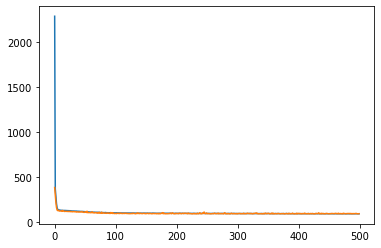

In [88]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [162]:
S = 0
N = 2900

In [163]:
predicted_value = model.predict(X_test[S:N])
predicted_value.shape

(2900, 1)

# 500 Epochs

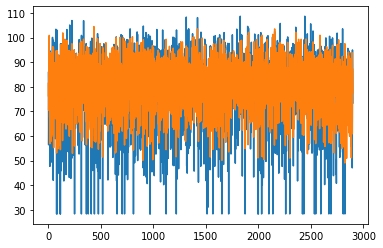

In [116]:
plt.plot(range(N-S),y_test[S:N]) # ground truth
plt.plot(range(N-S),predicted_value)
plt.show()

# 700 Epochs

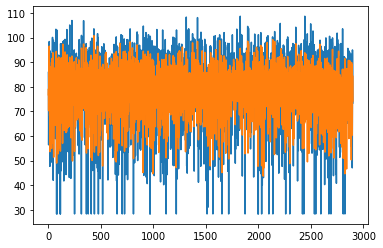

In [122]:
plt.plot(range(N-S),y_test[S:N]) # ground truth
plt.plot(range(N-S),predicted_value)
plt.show()

# 3000 Epochs 

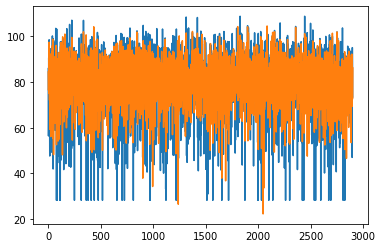

In [137]:
plt.plot(range(N-S),y_test[S:N]) # ground truth
plt.plot(range(N-S),predicted_value)
plt.show()

# 10000 Epochs

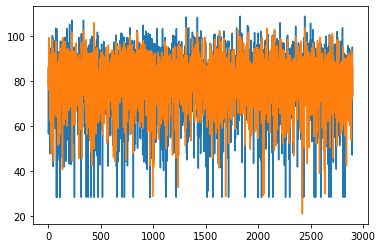

In [145]:
plt.plot(range(N-S),y_test[S:N]) # ground truth
plt.plot(range(N-S),predicted_value)
plt.show()

# 46000 Epochs

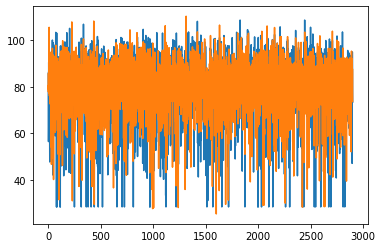

In [164]:
plt.plot(range(N-S),y_test[S:N]) # ground truth
plt.plot(range(N-S),predicted_value)
plt.show()

# 50000 Epochs

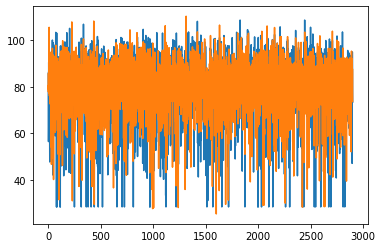

In [170]:
plt.plot(range(N-S),y_test[S:N]) # ground truth
plt.plot(range(N-S),predicted_value)
plt.show()